http://condor.depaul.edu/ntomuro/courses/575/assign/HW1.html

# CSC 575 Intelligent Information Retrieval
## Homework #1: Written questions

### Part 1
Suppose that we have a standard IR evaluation data set containing 1000 documents. Assume that a particular query in this data set is deemed to be relevant to the following 25 documents in the collection:

REL = { d1, d5, d6, d10, d88, d150, d200, d210, d250, d300, d400, d405, d450, d472, d500, d501, d530, d545, d590, d600, d635, d700, d720, d800, d900 }

Two different retrieval systems S1 and S2 are used to retrieve ranked lists of documents from this collection using the above query. The top 10 retrieved documents for these two systems are given below (each list is in decreasing order of relevance).

RET(S1) = d2, d5, d150, d250, d11, d33, d50, d600, d500, d520 
RET(S2) = d250, d400, d150, d210, d999, d3, d501, d800, d205, d300

In [ ]:
# R CODE
# P(relevant|retrieved)
precision <- function(rel, result) {
  length(intersect(rel,result))/length(result)
}

# P(retrieved|relevant)
recall <- function(rel, result) {
  length(intersect(rel,result))/length(rel)
}

REL <- c("d1","d5","d6","d10","d88","d150","d200","d210","d250","d300","d400","d405","d450","d472","d500","d501","d530","d545","d590","d600","d635","d700","d720","d800","d900")
REL

S1 <- c("d2","d5","d150","d250","d11","d33","d50","d600","d500","d520")
S2 <- c("d250","d400","d150","d210","d999","d3","d501","d800","d205","d300")

In [ ]:
s1pre <- c()
s2pre <- c()
s1rec <- c()
s2rec <- c()

for (i in 1:10){
  s1pre <- append(s1pre,(precision(REL,S1[1:i])))
  s2pre <- append(s2pre,(precision(REL,S2[1:i])))
  s1rec <- append(s1rec,(recall(REL,S1[1:i])))
  s2rec <- append(s2rec,(recall(REL,S2[1:i])))
}

# http://www.sthda.com/english/wiki/line-types-in-r-lty
plot(s1pre,type = 'l',ylim = c(0,1), col='red')
points(s2pre,type = 'l', col='blue',lty='twodash')

plot(s1rec,type='l',col='red')
points(s2rec,type='l',col='blue')

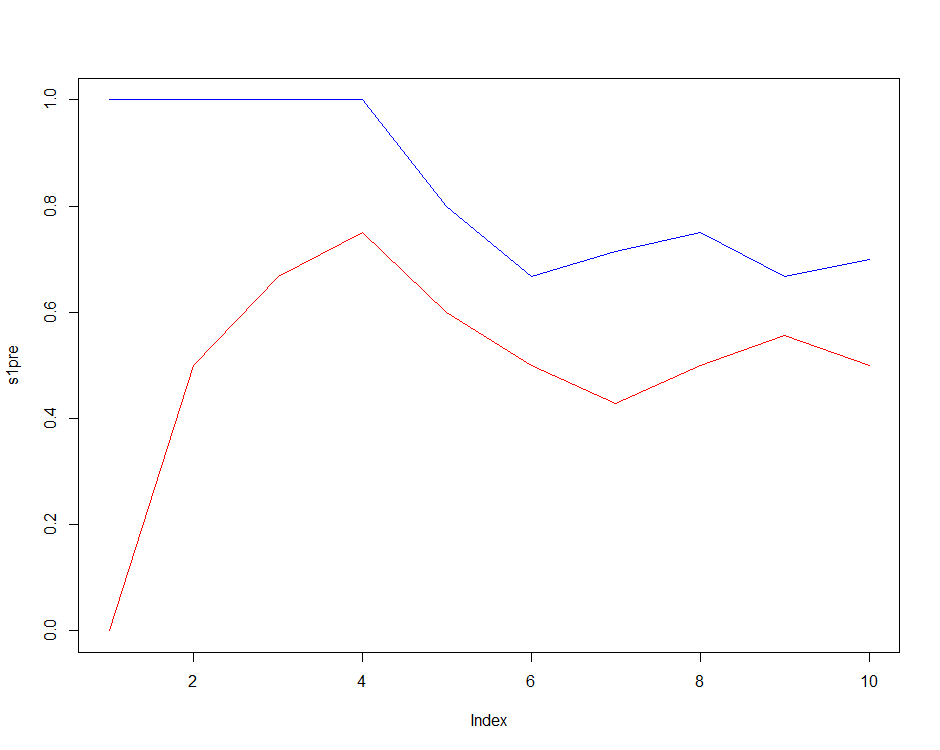

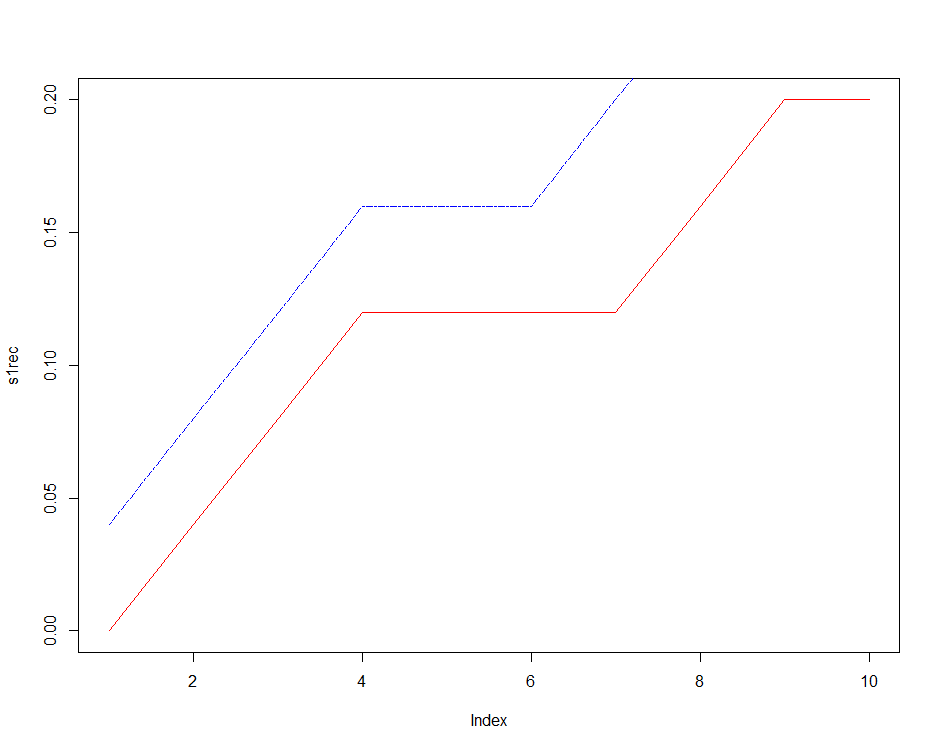

### Part 2
Use the query "jaguar" on three search engines Google, Yahoo, and Bing. Assume that you are interested in the sense of "Jaguar" as an animal (so a document is relevant if it is about the animal Jaguar). For each of your searches, record the top 10 results (do not count the "sponsored" results and only count the main results, not sub-categories of results which are often other documents from the same site as the main result).

Make a precision plot for the first 10 returned links as function of the number of returned documents, comparing the precision of the three search engines for this query (use a similar approach as part (b) of problem 1, except only for precision). Which of the search engines did better? Which would have done better if you were interested in "jaguar" as a car? Why do you think there might be a difference among these search engines?

| n  | Google | Yahoo | Bing |
|----|--------|-------|------|
| 1  | n      | n     | n    |
| 2  | n      | n     | n    |
| 3  | y      | n     | n    |
| 4  | n      | n     | n    |
| 5  | n      | n     | y    |
| 6  | n      | n     | n    |
| 7  | n      | n     | n    |
| 8  | n      | n     | n    |
| 9  | n      | n     | n    |
| 10 | y      | n     | n    |

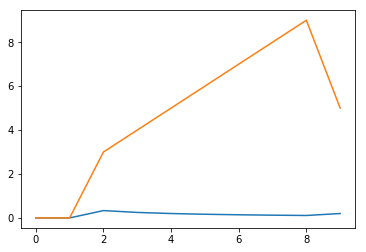

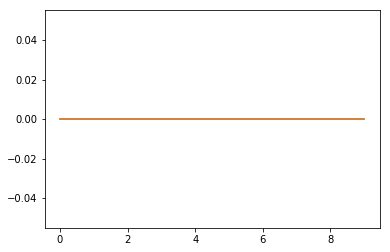

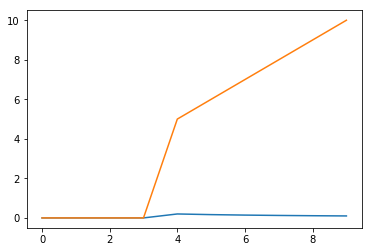

In [5]:
import matplotlib.pyplot as plt

google=[0,0,1,0,0,0,0,0,0,1]
yahoo=[0,0,0,0,0,0,0,0,0,0]
bing=[0,0,0,0,1,0,0,0,0,0]

p_google, p_yahoo, p_bing = [],[],[]
r_google, r_yahoo, r_bing = [],[],[]

def recall(x):
    return len(x)/sum(x) if sum(x) > 0 else 0

for i in range(1,11):
#     print(str(i)+'\t'+str(google[0:i]))
#     print(sum(google[0:i])/len(google[0:i]))
    p_google.append(sum(google[0:i])/len(google[0:i]))
    p_yahoo.append(sum(yahoo[0:i])/len(yahoo[0:i]))
    p_bing.append(sum(bing[0:i])/len(bing[0:i]))
    r_google.append(recall(google[0:i]))
    r_yahoo.append(recall(yahoo[0:i]))
    r_bing.append(recall(bing[0:i]))

plt.figure(1)
plt.plot(p_google)
plt.plot(r_google)

plt.figure(2)
plt.plot(p_yahoo)
plt.plot(r_yahoo)

plt.figure(3)
plt.plot(p_bing)
plt.plot(r_bing)
# plt.subplot(211)
# plt.plot(t, s1)
# plt.subplot(212)
# plt.plot(t, 2*s1)
plt.show()

# Part 3
### Inverted Index Construction:  Consider the following three short documents:

Doc #1

Glimpse is an indexing and query system that allows for search through a file system or document collection quickly. Glimpse is the default search engine in a larger information retrieval system. It has also been used as part of some web based search engines.

Doc #2

The main processes in an retrieval system are document indexing, query processing, query evaluation and relevance feedback. Among these, efficient updating of the index is critical in large scale systems.

Doc #3

Clusters are created from short snippets of documents retrieved by web search engines which are as good as clusters created from the full text of web documents.

In [3]:
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skhongro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skhongro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

a. First remove stop words, and punctuation, and apply Porter's stemming algorithm to the 3 documents (Note: You can write your program or use the online stemming application for this purpose).  Show the resulting documents.

In [5]:
docs = ['Glimpse is an indexing and query system that allows for search through a file system or document collection quickly. Glimpse is the default search engine in a larger information retrieval system. It has also been used as part of some web based search engines.'
        ,'The main processes in an retrieval system are document indexing, query processing, query evaluation and relevance feedback. Among these, efficient updating of the index is critical in large scale systems.'
        ,'Clusters are created from short snippets of documents retrieved by web search engines which are as good as clusters created from the full text of web documents.']

for i in range(0,len(docs)):
    docs[i] = docs[i].lower()

docs_token = docs
# docs_token[0] = word_tokenize(docs[0])
docs_token

porter = nltk.PorterStemmer()
for i in range(0,3):
    docs_token[i] = word_tokenize(docs[i])
    docs_token[i] = [w for w in docs_token[i] if w not in stopwords.words('english')] # filter English stopwords
    docs_token[i] = [porter.stem(tok) for tok in docs_token[i]] # apply stemmer
    docs_token[i] = [w for w in docs_token[i] if w.isalpha()] # filter tokens that contain non-alphabetic character(s)

for doc_t in docs_token:
    print(doc_t)
    print('\n')
# print (docs_token)

['glimps', 'index', 'queri', 'system', 'allow', 'search', 'file', 'system', 'document', 'collect', 'quickli', 'glimps', 'default', 'search', 'engin', 'larger', 'inform', 'retriev', 'system', 'also', 'use', 'part', 'web', 'base', 'search', 'engin']


['main', 'process', 'retriev', 'system', 'document', 'index', 'queri', 'process', 'queri', 'evalu', 'relev', 'feedback', 'among', 'effici', 'updat', 'index', 'critic', 'larg', 'scale', 'system']


['cluster', 'creat', 'short', 'snippet', 'document', 'retriev', 'web', 'search', 'engin', 'good', 'cluster', 'creat', 'full', 'text', 'web', 'document']




### b. Create an inverted index of the three documents, including the dictionary and the postings. The dictionary should also contain (for each term) statistics such as total number of occurrences in the collection and the document frequency. The postings for each term should contain the document ids and the term frequencies (depict multiple postings for a term as a linked list, similar to Figure 1.3 in the IR Book).

In [100]:
# https://spapas.github.io/2016/04/27/python-nested-list-comprehensions/
# non_flat = [ [1,2,3], [4,5,6], [7,8] ]
# >>> [y for x in non_flat for y in x]
# [1, 2, 3, 4, 5, 6, 7, 8]

# for x in non_flat:
#     for y in x:
#         y

from collections import Counter
word_count_dict = Counter(word for doc_t in docs_token for word in doc_t)
word_count_dict

# word_count_dict = nltk.FreqDist(word for doc_t in docs_token for word in doc_t)
# # for key in word_count_dict.keys():
# #     print(key+' '+str(word_count_dict[key]))

# for item in sorted(word_count_dict.items()):
#     print(item)

from collections import OrderedDict
# word_count_dict = OrderedDict()
word_count_dict = {}

for i in range(0,len(docs_token)):
#     print(docs_token[i])
    for word in docs_token[i]:
        word_count_dict.setdefault(word,[]).append(i)

print('DICTIONARY\n[TOKEN: freq, docfreq]')
# for key in word_count_dict.keys():
for key in sorted(word_count_dict.keys()):
    print(key+': '+
        str(len(word_count_dict[key]))+', '+
        str(sum(Counter(set(docid for docid in word_count_dict[key])).values()))
    )
#     print(Counter(docid for docid in word_count_dict[key]))
#     print(Counter(docid for docid in word_count_dict[key]).values())
#     print(Counter(set(docid for docid in word_count_dict[key])))

print('\nPOSTING\n[TOKEN: [docid,freq]]')

for key in sorted(word_count_dict.keys()):
    print(key+': '+str(list(Counter(docid for docid in word_count_dict[key]).items())))

DICTIONARY
[TOKEN: freq, docfreq]
allow: 1, 1
also: 1, 1
among: 1, 1
base: 1, 1
cluster: 2, 1
collect: 1, 1
creat: 2, 1
critic: 1, 1
default: 1, 1
document: 4, 3
effici: 1, 1
engin: 3, 2
evalu: 1, 1
feedback: 1, 1
file: 1, 1
full: 1, 1
glimps: 2, 1
good: 1, 1
index: 3, 2
inform: 1, 1
larg: 1, 1
larger: 1, 1
main: 1, 1
part: 1, 1
process: 2, 1
queri: 3, 2
quickli: 1, 1
relev: 1, 1
retriev: 3, 3
scale: 1, 1
search: 4, 2
short: 1, 1
snippet: 1, 1
system: 5, 2
text: 1, 1
updat: 1, 1
use: 1, 1
web: 3, 2

POSTING
[TOKEN: [docid,freq]]
allow: [(0, 1)]
also: [(0, 1)]
among: [(1, 1)]
base: [(0, 1)]
cluster: [(2, 2)]
collect: [(0, 1)]
creat: [(2, 2)]
critic: [(1, 1)]
default: [(0, 1)]
document: [(0, 1), (1, 1), (2, 2)]
effici: [(1, 1)]
engin: [(0, 2), (2, 1)]
evalu: [(1, 1)]
feedback: [(1, 1)]
file: [(0, 1)]
full: [(2, 1)]
glimps: [(0, 2)]
good: [(2, 1)]
index: [(0, 1), (1, 2)]
inform: [(0, 1)]
larg: [(1, 1)]
larger: [(0, 1)]
main: [(1, 1)]
part: [(0, 1)]
process: [(1, 2)]
queri: [(0, 1), (1, 2)

In [ ]:
# https://stackoverflow.com/questions/28019543/inverted-index-given-a-list-of-document-tokens-using-python
# https://codereview.stackexchange.com/questions/188918/creating-an-inverted-index-in-python

# docs_token = [['glimps', 'index', 'queri', 'system', 'allow', 'search', 'file', 'system', 'document', 'collect', 'quickli', 'glimps', 'default', 'search', 'engin', 'larger', 'inform', 'retriev', 'system', 'also', 'use', 'part', 'web', 'base', 'search', 'engin']
# ,['main', 'process', 'retriev', 'system', 'document', 'index', 'queri', 'process', 'queri', 'evalu', 'relev', 'feedback', 'among', 'effici', 'updat', 'index', 'critic', 'larg', 'scale', 'system']
# ,['cluster', 'creat', 'short', 'snippet', 'document', 'retriev', 'web', 'search', 'engin', 'good', 'cluster', 'creat', 'full', 'text', 'web', 'document']
# ]
from collections import defaultdict
index = defaultdict(list)

for i in range(0,len(docs_token)):
    for token in docs_token[i]:
        if i not in index[token]:
            index[token].append(i)
            
for key in sorted(index.keys()):
    print(key+": "+str(index[key]))

### c. What are the search results for the following Boolean queries (in each case explain how you obtained them from the inverted index):
* index AND query
* index OR query
* index AND (NOT query)
* (search AND query) OR (search AND retrieve)
* (index OR cluster) AND (web OR system)


In [106]:
def search_and(index,term1,term2):
    return set(index[term1]) & set(index[term2])

def search_or(index,term1,term2):
    return set(index[term1]) | set(index[term2])

# index AND query
print("index AND query")
print(search_and(index,'index','query'))
print("index AND queri")
print(search_and(index,'index','queri'))

# index OR query
print("\nindex OR query")
print(search_or(index,'index','query'))
print("index OR queri")
print(search_or(index,'index','queri'))

# index AND (NOT query)
print("\nindex AND (NOT query)")
print(set(index['index']) - set(index['query']))
print("index AND (NOT queri)")
print(set(index['index']) - set(index['queri']))


# (search AND query) OR (search AND retrieve)
print("\n(search AND query) OR (search AND retrieve)")
print(search_and(index,'search','query') | search_and(index,'search','retrieve'))
print("(search AND queri) OR (search AND retriev)")
print(search_and(index,'search','queri') | search_and(index,'search','retriev'))


# (index OR cluster) AND (web OR system)
print("\n(index OR cluster) AND (web OR system)")
print(search_or(index,'index','cluser') & search_or(index,'web','system'))

index AND query
set()
index AND queri
{0, 1}

index OR query
{0, 1}
index OR queri
{0, 1}

index AND (NOT query)
{0, 1}
index AND (NOT queri)
set()

(search AND query) OR (search AND retrieve)
set()
(search AND queri) OR (search AND retriev)
{0, 2}

(index OR cluster) AND (web OR system)
{0, 1}


### Part 4
#### Finite State Automata and Lexical Analysis:
[a] Construct a Finite State Automata recognizing the set of all binary strings with an odd number of 1's. Examples include: 1, 010, 111, 10110, 0010100111, etc.


http://madebyevan.com/fsm/

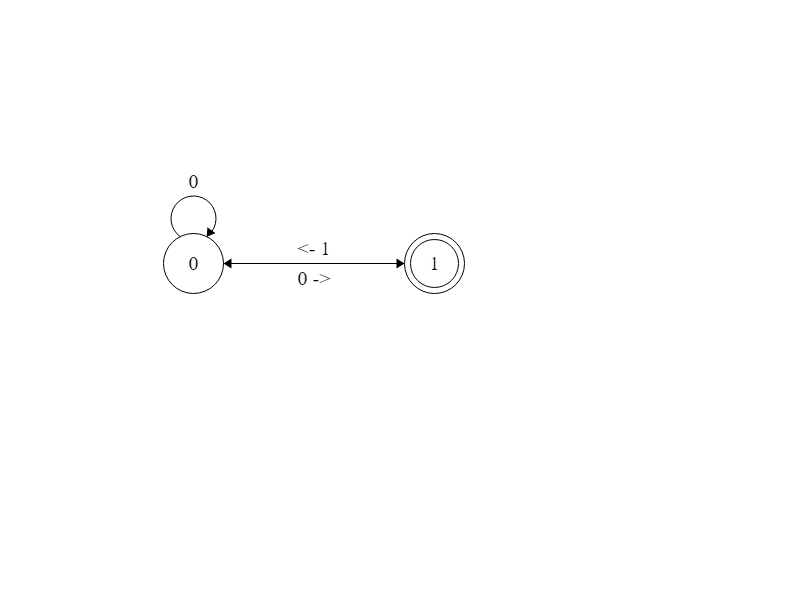

In [30]:
from IPython.display import HTML
hcode="""<?xml version="1.0" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">

<svg width="800" height="350" version="1.1" xmlns="http://www.w3.org/2000/svg">
    <text x="135" y="269.5" font-family="Times New Roman" font-size="30">→</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="193.5" cy="263.5" rx="30" ry="30"/>
	<text x="188.5" y="269.5" font-family="Times New Roman" font-size="20">0</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="434.5" cy="263.5" rx="30" ry="30"/>
	<text x="429.5" y="269.5" font-family="Times New Roman" font-size="20">1</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="434.5" cy="263.5" rx="24" ry="24"/>
	<path stroke="black" stroke-width="1" fill="none" d="M 180.275,236.703 A 22.5,22.5 0 1 1 206.725,236.703"/>
	<text x="188.5" y="187.5" font-family="Times New Roman" font-size="20">0</text>
	<polygon fill="black" stroke-width="1" points="206.725,236.703 215.473,233.17 207.382,227.292"/>
	<polygon stroke="black" stroke-width="1" points="223.5,263.5 404.5,263.5"/>
	<polygon fill="black" stroke-width="1" points="404.5,263.5 396.5,258.5 396.5,268.5"/>
	<text x="297.5" y="284.5" font-family="Times New Roman" font-size="20">0 →</text>
	<polygon stroke="black" stroke-width="1" points="404.5,263.5 223.5,263.5"/>
	<polygon fill="black" stroke-width="1" points="223.5,263.5 231.5,268.5 231.5,258.5"/>
	<text x="297.5" y="254.5" font-family="Times New Roman" font-size="20">← 1</text>
</svg>
"""
h = HTML(hcode)
display(h)

[b] Suppose that during document indexing we are interested in identifying all dates in the format mm/dd/yyyy, where mm is a 2 digit string representing the month (ranging from 01 through 12), dd is a 2-digit string representing the day (01-31), and yyyy are 4 digits representing the year. Furthermore, we are only interested in the years between 1990 and 2019. Example: 02/30/2012. Construct a Finite State Automata that exactly recognizes date tokens as described above. Notes: You do not need to match the month with the correct number of days. You may assume that dig is a special token representing all digits (0-9). Also, specify a regular expression that corresponds to the finite automata for this language.

In [33]:
from IPython.display import HTML
hcode="""<?xml version="1.0" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">

<svg width="800" height="500" version="1.1" xmlns="http://www.w3.org/2000/svg">
	<ellipse stroke="black" stroke-width="1" fill="none" cx="71.5" cy="114.5" rx="30" ry="30"/>
	<text x="66.5" y="120.5" font-family="Times New Roman" font-size="20">0</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="156.5" cy="47.5" rx="30" ry="30"/>
	<text x="151.5" y="53.5" font-family="Times New Roman" font-size="20">1</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="156.5" cy="180.5" rx="30" ry="30"/>
	<text x="151.5" y="186.5" font-family="Times New Roman" font-size="20">2</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="243.5" cy="114.5" rx="30" ry="30"/>
	<text x="238.5" y="120.5" font-family="Times New Roman" font-size="20">3</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="360.5" cy="114.5" rx="30" ry="30"/>
	<text x="355.5" y="120.5" font-family="Times New Roman" font-size="20">4</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="433.5" cy="47.5" rx="30" ry="30"/>
	<text x="428.5" y="53.5" font-family="Times New Roman" font-size="20">5</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="433.5" cy="187.5" rx="30" ry="30"/>
	<text x="428.5" y="193.5" font-family="Times New Roman" font-size="20">6</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="510.5" cy="114.5" rx="30" ry="30"/>
	<text x="505.5" y="120.5" font-family="Times New Roman" font-size="20">7</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="561.5" cy="285.5" rx="30" ry="30"/>
	<text x="556.5" y="291.5" font-family="Times New Roman" font-size="20">8</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="418.5" cy="285.5" rx="30" ry="30"/>
	<text x="413.5" y="291.5" font-family="Times New Roman" font-size="20">9</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="561.5" cy="411.5" rx="30" ry="30"/>
	<text x="551.5" y="417.5" font-family="Times New Roman" font-size="20">10</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="282.5" cy="285.5" rx="30" ry="30"/>
	<text x="272.5" y="291.5" font-family="Times New Roman" font-size="20">11</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="418.5" cy="411.5" rx="30" ry="30"/>
	<text x="408.5" y="417.5" font-family="Times New Roman" font-size="20">12</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="138.5" cy="285.5" rx="30" ry="30"/>
	<text x="128.5" y="291.5" font-family="Times New Roman" font-size="20">13</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="138.5" cy="411.5" rx="30" ry="30"/>
	<text x="128.5" y="417.5" font-family="Times New Roman" font-size="20">15</text>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="138.5" cy="411.5" rx="24" ry="24"/>
	<ellipse stroke="black" stroke-width="1" fill="none" cx="282.5" cy="411.5" rx="30" ry="30"/>
	<text x="272.5" y="417.5" font-family="Times New Roman" font-size="20">14</text>
	<polygon stroke="black" stroke-width="1" points="95.061,95.929 132.939,66.071"/>
	<polygon fill="black" stroke-width="1" points="132.939,66.071 123.561,67.097 129.752,74.95"/>
	<text x="119.5" y="101.5" font-family="Times New Roman" font-size="20">0</text>
	<polygon stroke="black" stroke-width="1" points="95.196,132.899 132.804,162.101"/>
	<polygon fill="black" stroke-width="1" points="132.804,162.101 129.552,153.245 123.419,161.144"/>
	<text x="98.5" y="168.5" font-family="Times New Roman" font-size="20">1</text>
	<polygon stroke="black" stroke-width="1" points="180.269,65.805 219.731,96.195"/>
	<polygon fill="black" stroke-width="1" points="219.731,96.195 216.444,87.353 210.342,95.276"/>
	<text x="159.5" y="101.5" font-family="Times New Roman" font-size="20">1...9</text>
	<polygon stroke="black" stroke-width="1" points="180.401,162.368 219.599,132.632"/>
	<polygon fill="black" stroke-width="1" points="219.599,132.632 210.204,133.483 216.248,141.45"/>
	<text x="205.5" y="168.5" font-family="Times New Roman" font-size="20">0,1,2</text>
	<polygon stroke="black" stroke-width="1" points="273.5,114.5 330.5,114.5"/>
	<polygon fill="black" stroke-width="1" points="330.5,114.5 322.5,109.5 322.5,119.5"/>
	<text x="299.5" y="135.5" font-family="Times New Roman" font-size="20">/</text>
	<polygon stroke="black" stroke-width="1" points="382.602,94.215 411.398,67.785"/>
	<polygon fill="black" stroke-width="1" points="411.398,67.785 402.123,69.511 408.885,76.879"/>
	<text x="402.5" y="101.5" font-family="Times New Roman" font-size="20">3</text>
	<polygon stroke="black" stroke-width="1" points="456.132,67.193 487.868,94.807"/>
	<polygon fill="black" stroke-width="1" points="487.868,94.807 485.115,85.784 478.551,93.328"/>
	<text x="441.5" y="101.5" font-family="Times New Roman" font-size="20">0,1</text>
	<polygon stroke="black" stroke-width="1" points="381.713,135.713 412.287,166.287"/>
	<polygon fill="black" stroke-width="1" points="412.287,166.287 410.165,157.094 403.094,164.165"/>
	<text x="351.5" y="171.5" font-family="Times New Roman" font-size="20">0,1,2</text>
	<polygon stroke="black" stroke-width="1" points="455.271,166.86 488.729,135.14"/>
	<polygon fill="black" stroke-width="1" points="488.729,135.14 479.483,137.016 486.363,144.273"/>
	<text x="477.5" y="171.5" font-family="Times New Roman" font-size="20">0...9</text>
	<polygon stroke="black" stroke-width="1" points="519.074,143.249 552.926,256.751"/>
	<polygon fill="black" stroke-width="1" points="552.926,256.751 555.431,247.656 545.848,250.514"/>
	<text x="522.5" y="212.5" font-family="Times New Roman" font-size="20">/</text>
	<polygon stroke="black" stroke-width="1" points="531.5,285.5 448.5,285.5"/>
	<polygon fill="black" stroke-width="1" points="448.5,285.5 456.5,290.5 456.5,280.5"/>
	<text x="485.5" y="276.5" font-family="Times New Roman" font-size="20">1</text>
	<polygon stroke="black" stroke-width="1" points="561.5,315.5 561.5,381.5"/>
	<polygon fill="black" stroke-width="1" points="561.5,381.5 566.5,373.5 556.5,373.5"/>
	<text x="546.5" y="354.5" font-family="Times New Roman" font-size="20">2</text>
	<polygon stroke="black" stroke-width="1" points="388.5,285.5 312.5,285.5"/>
	<polygon fill="black" stroke-width="1" points="312.5,285.5 320.5,290.5 320.5,280.5"/>
	<text x="345.5" y="276.5" font-family="Times New Roman" font-size="20">9</text>
	<polygon stroke="black" stroke-width="1" points="531.5,411.5 448.5,411.5"/>
	<polygon fill="black" stroke-width="1" points="448.5,411.5 456.5,416.5 456.5,406.5"/>
	<text x="485.5" y="402.5" font-family="Times New Roman" font-size="20">0</text>
	<polygon stroke="black" stroke-width="1" points="252.5,285.5 168.5,285.5"/>
	<polygon fill="black" stroke-width="1" points="168.5,285.5 176.5,290.5 176.5,280.5"/>
	<text x="205.5" y="276.5" font-family="Times New Roman" font-size="20">9</text>
	<polygon stroke="black" stroke-width="1" points="138.5,315.5 138.5,381.5"/>
	<polygon fill="black" stroke-width="1" points="138.5,381.5 143.5,373.5 133.5,373.5"/>
	<text x="98.5" y="354.5" font-family="Times New Roman" font-size="20">0...9</text>
	<polygon stroke="black" stroke-width="1" points="388.5,411.5 312.5,411.5"/>
	<polygon fill="black" stroke-width="1" points="312.5,411.5 320.5,416.5 320.5,406.5"/>
	<text x="338.5" y="402.5" font-family="Times New Roman" font-size="20">0,1</text>
	<polygon stroke="black" stroke-width="1" points="252.5,411.5 168.5,411.5"/>
	<polygon fill="black" stroke-width="1" points="168.5,411.5 176.5,416.5 176.5,406.5"/>
	<text x="193.5" y="402.5" font-family="Times New Roman" font-size="20">0...9</text>
</svg>
"""
h = HTML(hcode)
display(h)

## Part 5
#### Ngrams: Using bigrams, which of the following terms is more likely to be considered equivalent to the term "informational"?  Justify your answer by using Dice's coefficient to measure similarity of each term to "informational".
* "informal"
* "formalization"

In [ ]:
# R CODE
> slicer <- function(text){
+   if(is.na(text)) {return (NA)}
+   bigrams = c()
+   for (i in 2:nchar(text)-1) {
+     # print(i)
+     # print(substr(text,i,i+1))
+     bigrams <- append(bigrams,c(substr(text,i,i+1)))
+   }
+   return(bigrams)
+ }
> dice <- function(seta,setb){
+   (length(intersect(seta,setb))*2)/(length(unique(seta))+length(unique(setb)))
+ }


> slicer('statistical')
[1] "st" "ta" "at" "ti" "is" "st" "ti" "ic" "ca" "al"
 
> slicer('statistics')
[1] "st" "ta" "at" "ti" "is" "st" "ti" "ic" "cs"


> dice(slicer('statistical'),slicer('statistics'))
[1] 0.8

> slicer('informal')
[1] "in" "nf" "fo" "or" "rm" "ma" "al"

> slicer('formalization')
 [1] "fo" "or" "rm" "ma" "al" "li" "iz" "za" "at" "ti" "io" "on"
 
> slicer('informational')
 [1] "in" "nf" "fo" "or" "rm" "ma" "at" "ti" "io" "on" "na" "al"


> dice(slicer('informal'),slicer('informational'))
[1] 0.7368421

> dice(slicer('formalization'),slicer('informational'))
[1] 0.75

## Part 6

Mutual Information: The following table shows the raw occurrence frequencies of some words in a hypothetical collection. If x and y represent two distinct words, f(x) and f(y) denote the raw frequencies for words x and y, respectively. Assume that the frequency of co-occurrence of x and y has already been computed and is denoted by f(x,y). [Note that the probability of occurrence is estimated as the raw frequency divided by the total number of terms.]

| x      | y       | f(x) | f(y) | f(x,y) |
|--------|---------|------|------|--------|
| color  | blue    | 20   | 40   | 10     |
| color  | green   | 20   | 10   | 5      |
| blue   | green   | 40   | 10   | 5      |
| united | states  | 25   | 20   | 15     |
| united | airline | 25   | 10   | 5      |
| states | airline | 20   | 10   | 2      |
Assuming that the total number of tokens N=1000 in the collection, rank these pairs of words in decreasing order of (pointwise) mutual information. Show your detailed calculations in at least one case and the final values for all cases.

$$I(x,y) = ​​log_2 ​​ \frac{​​P(x,y)​​}{P(x)​.​P(y)}  $$

[1]
$$  log_2 \frac{\frac{10}{1000}}{\frac{20}{1000} . \frac{40}{1000}}    = log_2 \frac{100}{8} = log_2 12.5 = 37.6287$$

[2]
$$  log_2 \frac{\frac{5}{1000}}{\frac{20}{1000} . \frac{10}{1000}}    = log_2 \frac{50}{2} = log_2 25 = 4.6438$$

| x      | y       | f(x) | f(y) | f(x,y) | I(x,y)    |
|--------|---------|------|------|--------|-----------|
| united | states  | 25   | 20   | 15     | 4.9068906 |
| color  | green   | 20   | 10   | 5      | 4.6438562 |
| united | airline | 25   | 10   | 5      | 4.3219281 |
| color  | blue    | 20   | 40   | 10     | 3.6438562 |
| blue   | green   | 40   | 10   | 5      | 3.6438562 |
| states | airline | 20   | 10   | 2      | 3.3219281 |

Tables in MD
* https://www.tablesgenerator.com/markdown_tables

Formulas in MD
* http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/
* https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
* https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook